In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = np.genfromtxt('SpectralLine1.dat')

In [3]:
data1

array([[ 1.000e+00,  1.420e+00],
       [ 2.000e+00,  4.680e-01],
       [ 3.000e+00,  7.620e-01],
       [ 4.000e+00, -1.312e+00],
       [ 5.000e+00,  2.029e+00],
       [ 6.000e+00,  8.600e-02],
       [ 7.000e+00,  1.249e+00],
       [ 8.000e+00, -3.680e-01],
       [ 9.000e+00, -6.570e-01],
       [ 1.000e+01, -1.294e+00],
       [ 1.100e+01, -2.350e-01],
       [ 1.200e+01, -1.920e-01],
       [ 1.300e+01, -2.690e-01],
       [ 1.400e+01,  8.270e-01],
       [ 1.500e+01, -6.850e-01],
       [ 1.600e+01, -7.020e-01],
       [ 1.700e+01, -9.370e-01],
       [ 1.800e+01,  1.331e+00],
       [ 1.900e+01, -1.772e+00],
       [ 2.000e+01, -5.300e-01],
       [ 2.100e+01,  3.300e-01],
       [ 2.200e+01,  1.205e+00],
       [ 2.300e+01,  1.613e+00],
       [ 2.400e+01,  3.000e-01],
       [ 2.500e+01, -4.600e-02],
       [ 2.600e+01, -2.600e-02],
       [ 2.700e+01, -5.190e-01],
       [ 2.800e+01,  9.240e-01],
       [ 2.900e+01,  2.300e-01],
       [ 3.000e+01,  8.770e-01],
       [ 3

In [4]:
channel = data1[:, 0]
signal  = data1[:, 1]

In [5]:
channel

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.])

In [6]:
signal

array([ 1.420e+00,  4.680e-01,  7.620e-01, -1.312e+00,  2.029e+00,
        8.600e-02,  1.249e+00, -3.680e-01, -6.570e-01, -1.294e+00,
       -2.350e-01, -1.920e-01, -2.690e-01,  8.270e-01, -6.850e-01,
       -7.020e-01, -9.370e-01,  1.331e+00, -1.772e+00, -5.300e-01,
        3.300e-01,  1.205e+00,  1.613e+00,  3.000e-01, -4.600e-02,
       -2.600e-02, -5.190e-01,  9.240e-01,  2.300e-01,  8.770e-01,
       -6.500e-01, -1.004e+00,  2.480e-01, -1.169e+00,  9.150e-01,
        1.113e+00,  1.463e+00,  2.732e+00,  5.710e-01,  8.650e-01,
       -8.490e-01, -1.710e-01,  1.031e+00,  1.105e+00, -3.440e-01,
       -8.700e-02, -3.510e-01,  1.248e+00,  1.000e-03,  3.600e-01,
       -4.970e-01, -7.200e-02,  1.094e+00, -1.425e+00,  2.830e-01,
       -1.526e+00, -1.174e+00, -5.580e-01,  1.282e+00, -3.840e-01,
       -1.200e-01, -1.870e-01,  6.460e-01,  3.990e-01])

Text(0, 0.5, 'signal strength (mK)')

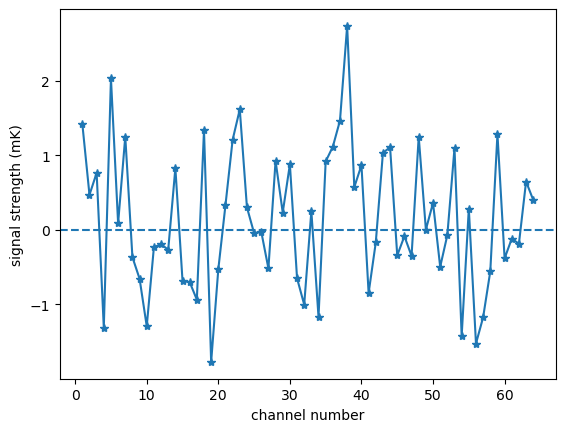

In [9]:
plt.plot(channel, signal, marker='*')
plt.axhline(y=0, linestyle='--')
plt.xlabel("channel number")
plt.ylabel("signal strength (mK)")

In [13]:
def model1(nu, T, nu0=37.0, sigL=2.0):
    S = T*np.exp(-((nu-nu0)**2)/(2*sigL*sigL))
    return S

In [26]:
def model2(nu):
#    S = np.zeros_like(nu)
    S = 0.0*nu
    return S

In [27]:
testchannel = np.arange(1, 64.1, 0.1)
testmodel1 = model1(testchannel, 1.0)
testmodel2 = model2(testchannel)

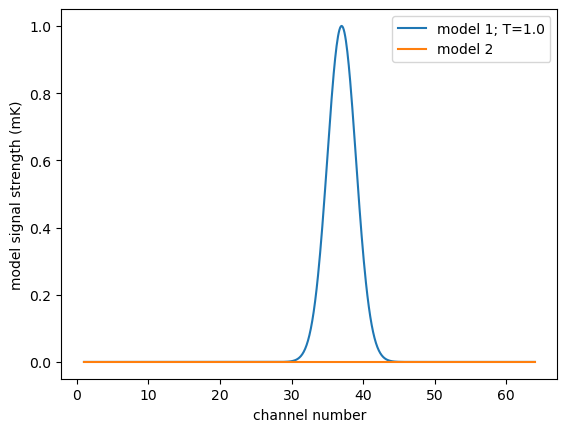

In [28]:
plt.plot(testchannel, testmodel1, label='model 1; T=1.0')
plt.plot(testchannel, testmodel2, label='model 2')
plt.xlabel("channel number")
plt.ylabel("model signal strength (mK)")
plt.legend()

In [20]:
def logLikelihood(data, model, sig=1.0):
    N = len(data)
    logL = -np.sum((data-model)**2)/(2*sig*sig) - (N/2)*np.log(2*np.pi) - N*np.log(sig)
    return logL

In [21]:
Tml = 1.561
modelMaxL = model1(channel, Tml)
maxL1 = logLikelihood(signal, modelMaxL)

In [24]:
print("max ln(L) = ", maxL1)
print("    max L = ", np.exp(maxL1))

max ln(L) =  -83.05324483203903
    max L =  8.519891523193788e-37


In [25]:
def priorUniform(T, Tmin=0.1, Tmax=100.0):
    prior = (T/T)/(Tmax-Tmin)
    return prior

In [29]:
def priorJeffreys(T, Tmin=0.1, Tmax=100.0):
    prior = 1.0/(T*np.log(Tmax/Tmin))
    return prior

In [30]:
testsignal = np.arange(0.1, 100, 0.1)
testprior1 = priorUniform(testsignal)
testprior2 = priorJeffreys(testsignal)

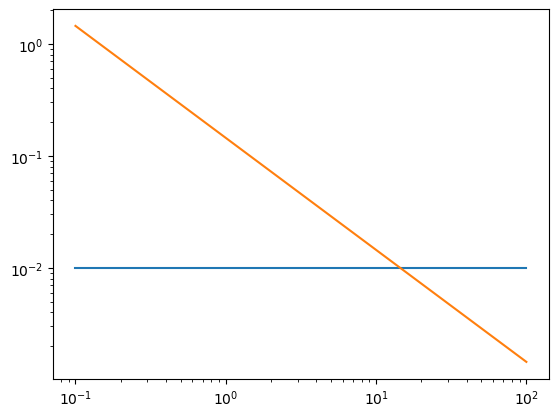

In [33]:
plt.plot(testsignal, testprior1, label='uniform')
plt.plot(testsignal, testprior2, label='Jeffreys')
plt.xscale('log')
plt.yscale('log')

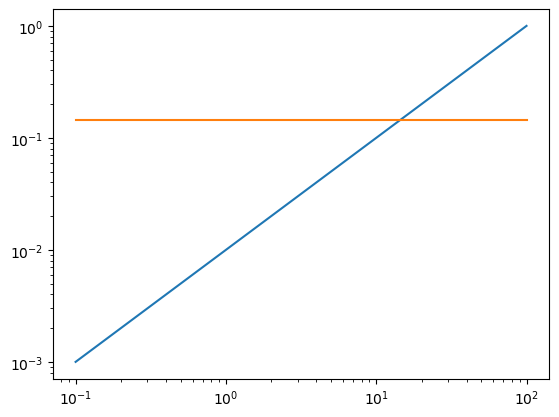

In [35]:
plt.plot(testsignal, testsignal*testprior1, label='uniform')
plt.plot(testsignal, testsignal*testprior2, label='Jeffreys')
plt.xscale('log')
plt.yscale('log')

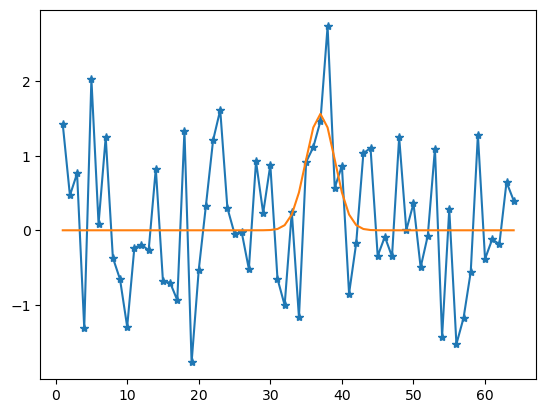

In [36]:
plt.plot(channel, signal, marker='*', label='Data')
plt.plot(channel, modelMaxL, label='max-L model')

In [40]:
Trange = np.arange(0.1, 100, 0.01)
logL = np.empty_like(Trange)
for i, t in enumerate(Trange):
    modelTmp = model1(channel, t)
    logL[i] = logLikelihood(signal, modelTmp)

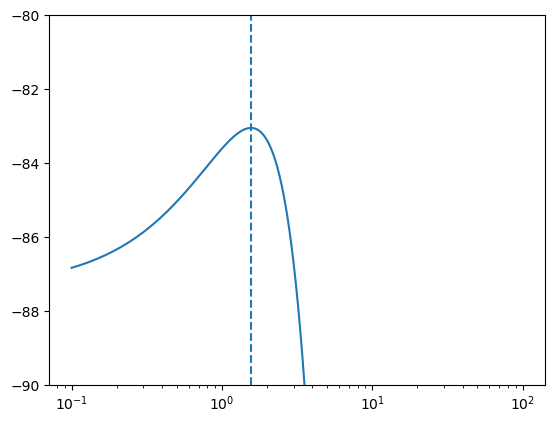

In [44]:
plt.plot(Trange, logL)
plt.xscale('log')
plt.ylim([-90,-80])
plt.axvline(x=1.571, linestyle="--")

In [45]:
def logPosterior(prior, logL):
    return np.log(prior) + logL

(0.0099, 0.01005)

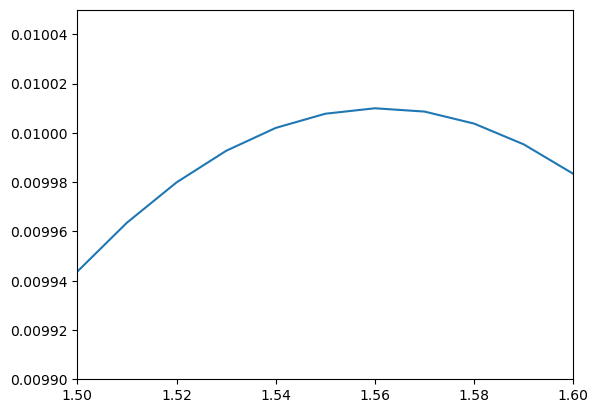

In [58]:
priorU = priorUniform(Trange)
priorJ = priorJeffreys(Trange)
plt.plot(Trange, np.exp(logPosterior(priorU, logL)-maxL1))
plt.plot(Trange, np.exp(logPosterior(priorJ, logL)-maxL1-2.4))
plt.xlim([1.5,1.6])
plt.ylim([0.0099, 0.01005])